In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

from collections import Counter

import tensorflow as tf
import keras

import re

Load raw data and take a quick look

In [3]:
df = pd.read_csv('data.txt', names=['text'])
df.head()

,text
0,1、立志欲堅不欲銳，成功在久不在速。——張孝祥
1,2、天空黑暗到一定程度，星辰就會熠熠生輝。
2,3、人生最大的錯誤是不斷擔心會犯錯。
3,4、人若軟弱就是自己最大的敵人；人若勇敢就是自己最好的朋友。
4,5、如果你想得到，你就會得到，你所需要付出的只是行動。


In [6]:
np.mean(df['text'].apply(lambda x: ',' in x))

0.0

C:\Users\etbear\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


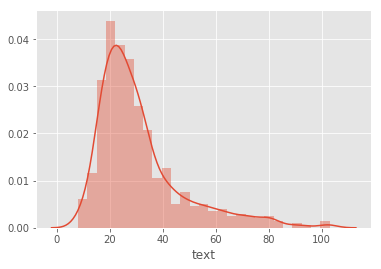

In [9]:
sns.distplot(df['text'].apply(lambda x:len(x)))

C:\Users\etbear\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


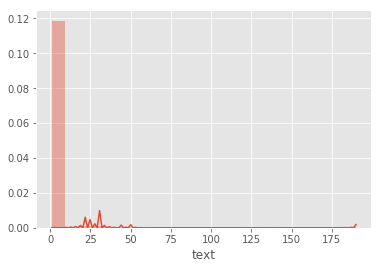

In [10]:
sns.distplot(df['text'].apply(lambda x:len(x.encode().split(b'\xe3\x80\x81')[0])))

In [22]:
t = df['text'][0].encode()

In [29]:
Counter(df['text'].apply(lambda x:len(x.encode().split(b'\xe3\x80\x81'))))

Counter({2: 542, 3: 5, 5: 1, 4: 1, 1: 14})

In [30]:
df[df['text'].apply(lambda x:len(x.encode().split(b'\xe3\x80\x81'))) > 2]

,text
51,52、障礙與失敗，是通往成功最穩靠的踏脚石，肯研究、利用它們，便能從失敗中培養出成功。
186,87、灰心是无情的子弹，一旦被它击中了，再健康、强壮的人生，也会受到损伤。
205,106、这个社会很简单、只是人太复杂。
270,51、行动是治愈恐惧的良药，而犹豫、拖延将不断滋养恐惧。
299,80、天不給我路走、我自己找路走、地不让我的路平、我自己踏平！这年头不气盛就不叫年轻人！
408,96、不要放棄自己，勇敢地接受生命的挑戰。有一天我們可以老死、病死、窮死，但絕不要允許自己失...
557,109、行动是治愈恐惧的良药，而犹豫、拖延将不断滋养恐惧。


In [7]:
df[df['text'].apply(lambda x:len(x.encode().split(b'\xe3\x80\x81')[0]))>3]

,text
439,———— 华特・贝基霍
469,——— 莎士比亚的名言
529,——— 《青春派》
531,——— 《心术》
536,——— 《新恋爱时代》
546,——— 歌德的名言
548,——— 纪伯伦的名言 《沙与沫》
550,——— 乐小米经典语录 《岸芷蝶舞》
552,——— 俞敏洪经典语录
554,——— 俞敏洪经典语录


In [28]:
df[557:563]

,text
557,109、行动是治愈恐惧的良药，而犹豫、拖延将不断滋养恐惧。
558,——— 莫言名言
559,110、积极的人在每一次忧患中都看到一个机会，而消极的人则在每个机会都看到某种忧患。莫找借口...
560,——— 莫言名言
561,111、人生最可悲的并非失去四肢，而是没有生存希望及目标!人们经常埋怨什么也做不来。
562,但如果我们只记挂着想拥有或欠缺的东西，而不去珍惜所拥有的，那根本改变不了问题!真正改变命运的...


In [25]:
print(len(df.iloc[562]['text'].encode().split(b'\xe3\x80\x81')))
print(df.iloc[562]['text'].encode())

1
b'\xe4\xbd\x86\xe5\xa6\x82\xe6\x9e\x9c\xe6\x88\x91\xe4\xbb\xac\xe5\x8f\xaa\xe8\xae\xb0\xe6\x8c\x82\xe7\x9d\x80\xe6\x83\xb3\xe6\x8b\xa5\xe6\x9c\x89\xe6\x88\x96\xe6\xac\xa0\xe7\xbc\xba\xe7\x9a\x84\xe4\xb8\x9c\xe8\xa5\xbf\xef\xbc\x8c\xe8\x80\x8c\xe4\xb8\x8d\xe5\x8e\xbb\xe7\x8f\x8d\xe6\x83\x9c\xe6\x89\x80\xe6\x8b\xa5\xe6\x9c\x89\xe7\x9a\x84\xef\xbc\x8c\xe9\x82\xa3\xe6\xa0\xb9\xe6\x9c\xac\xe6\x94\xb9\xe5\x8f\x98\xe4\xb8\x8d\xe4\xba\x86\xe9\x97\xae\xe9\xa2\x98!\xe7\x9c\x9f\xe6\xad\xa3\xe6\x94\xb9\xe5\x8f\x98\xe5\x91\xbd\xe8\xbf\x90\xe7\x9a\x84\xef\xbc\x8c\xe5\xb9\xb6\xe4\xb8\x8d\xe6\x98\xaf\xe6\x88\x91\xe4\xbb\xac\xe7\x9a\x84\xe6\x9c\xba\xe9\x81\x87\xef\xbc\x8c\xe8\x80\x8c\xe6\x98\xaf\xe6\x88\x91\xe4\xbb\xac\xe7\x9a\x84\xe6\x80\x81\xe5\xba\xa6\xe3\x80\x82'


In [23]:
t

b'1\xe3\x80\x81\xe7\xab\x8b\xe5\xbf\x97\xe6\xac\xb2\xe5\xa0\x85\xe4\xb8\x8d\xe6\xac\xb2\xe9\x8a\xb3\xef\xbc\x8c\xe6\x88\x90\xe5\x8a\x9f\xe5\x9c\xa8\xe4\xb9\x85\xe4\xb8\x8d\xe5\x9c\xa8\xe9\x80\x9f\xe3\x80\x82\xe2\x80\x94\xe2\x80\x94\xe5\xbc\xb5\xe5\xad\x9d\xe7\xa5\xa5'

In [36]:
t.split(b'\xe3\x80\x81')

[b'1',
 b'\xe7\xab\x8b\xe5\xbf\x97\xe6\xac\xb2\xe5\xa0\x85\xe4\xb8\x8d\xe6\xac\xb2\xe9\x8a\xb3\xef\xbc\x8c\xe6\x88\x90\xe5\x8a\x9f\xe5\x9c\xa8\xe4\xb9\x85\xe4\xb8\x8d\xe5\x9c\xa8\xe9\x80\x9f\xe3\x80\x82\xe2\x80\x94\xe2\x80\x94\xe5\xbc\xb5\xe5\xad\x9d\xe7\xa5\xa5']